In [ ]:
### part 1 Data prerpocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
x=dataset.iloc[:,3:13] #independent variable
y=dataset.iloc[:,13]  #dependent variable

#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)


In [5]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [6]:
## Concatenate the Data Frames

x=pd.concat([x,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
# Feature Scaling  is used to perform data's in floating formate
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
###### Part 2 - Now let's make the ANN!

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [43]:
# Initialising the ANN
classifier = Sequential()

In [44]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer='he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))

# Adding the 3rd  hidden layer
classifier.add(Dense(units=15, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [45]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])   #binary cross entropy for binary output 1's and 0's

In [47]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6542 - loss: 0.8156 - val_accuracy: 0.7948 - val_loss: 0.5479
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7177 - loss: 0.6908 - val_accuracy: 0.7955 - val_loss: 0.5276
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7579 - loss: 0.6164 - val_accuracy: 0.7955 - val_loss: 0.5169
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7686 - loss: 0.5852 - val_accuracy: 0.7955 - val_loss: 0.5085
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7815 - loss: 0.5468 - val_accuracy: 0.7955 - val_loss: 0.5031
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7887 - loss: 0.5282 - val_accuracy: 0.7955 - val_loss: 0.4986
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7995 - loss: 0.5188 - val_accuracy: 0.7955 - val_loss: 0.4961
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7984 - loss: 0.5098 - val_accu

In [ ]:
# Part 3 - Making the predictions and evaluating the model

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



In [50]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


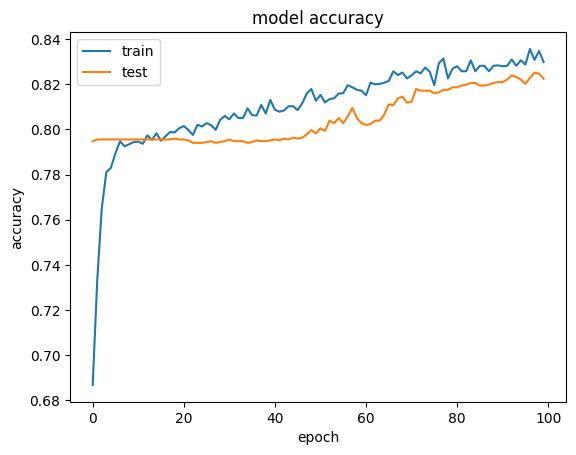

In [51]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

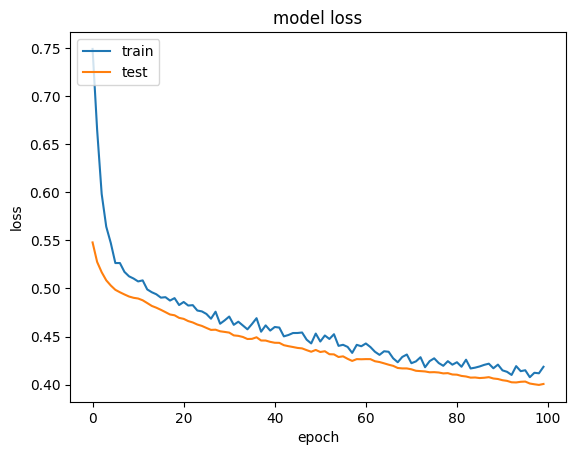

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

##part 4 is done inbetweeb part 2 nd part 3

## hyper parameter tuning [How to Select how many hidden layer and neurons in a neural network]

In [57]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV    #for hyper peram its using


In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [ ]:
## create layer and activation function to perform hyper parametr tuning in ann

In [61]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

      #output layer adding
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    #complining the ann model
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [69]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.6.0


In [70]:
pip install --upgrade tensorflow scikeras scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tenso

In [62]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [64]:
layers = [[20], [40, 20], [45, 30, 15]]   #applying 1st 2nd and 3rd layer
activations = ['sigmoid', 'relu']       # use actiavtion fun either sigmoid or relu
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])


In [67]:
## applying grid search CV for hyper parameter tuning

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [68]:
grid_result = grid.fit(x_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

AttributeError: 'super' object has no attribute '__sklearn_tags__'